In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k


# Linear regression
## Example: height vs. weight data

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
# height in inches (in), weight in pounds (lbs)
df.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,22627,1,2,1,35.30,8,16,76,290
1,7379,1,1,1,34.71,7,16,76,285
2,51659,1,1,1,34.71,6,12,76,285
3,28679,1,2,1,34.10,7,13,76,280
4,33982,1,1,1,34.10,7,16,76,280


In [4]:
X = np.array(df['height'].values)
y = np.array(df['weight'].values)

In [5]:
y

array([290, 285, 285, ..., 102, 100, 100])

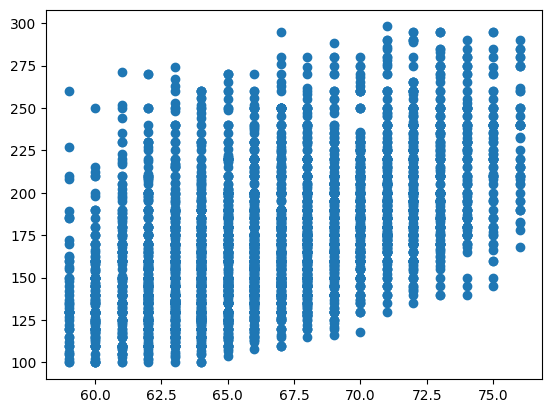

In [6]:
# height vs. weight data as scatter plot
plt.scatter(x=X, y=y)

In [7]:
# linear regression: fit with y = a*x + b (polynomial of degree 1)
# a = model weight, or slope; b = bias or offset

reg = np.polyfit(X, y, 1)
reg

array([   5.1706199 , -171.72995299])

## OK, that was easy, but how does it work?

In [8]:
# initial linear fit values
a = 1
b = 0

# linear function f(x) = ax + b
def f(x):
    return a * x + b


In [9]:
learning_rate = 1e-2

In [10]:
def fit(X, y, a, b):
    y_pred = f(X)
    loss = np.power(np.power(y_pred - y, 2).sum(), 0.5)
    a = ((y - b) / X).mean()
    grad_b = f(X.mean()) - a * X.mean()
    b += learning_rate * grad_b
    return loss, a, b

In [11]:
loss, a, b = fit(X, y, a, b)

In [12]:
loss

7377.088721169076

In [13]:
last_loss = loss
while last_loss >= loss:
    last_loss = loss
    loss, a, b = fit(X, y, a, b)
    print(loss)

2254.590250076391
2251.203282207878
2251.1681543215755
2251.155822266544
2251.1435953348446
2251.1312479371923
2251.118776620548
2251.1061801265914
2251.093457206758
2251.080606600418
2251.067627034541
2251.0545172235798
2251.0412758693446
2251.0279016608893
2251.0143932743836
2251.000749372994
2250.986968606759
2250.973049612464
2250.9589910135137
2250.944791419808
2250.9304494276116
2250.915963619424
2250.901332563851
2250.8865548154718
2250.8716289147046
2250.856553387676
2250.841326746082
2250.825947487054
2250.8104140930213
2250.7947250315706
2250.778878755307
2250.7628737017126
2250.746708293005
2250.7303809359923
2250.7138900219284
2250.6972339263675
2250.6804110090156
2250.6634196135833
2250.646258067635
2250.6289246824376
2250.6114177528093
2250.593735556962
2250.5758763563517
2250.5578383955176
2250.5396199019274
2250.521219085815
2250.5026341400253
2250.4838632398455
2250.4649045428478
2250.445756188723
2250.4264162991135
2250.4068829774487
2250.3871543087744
2250.3672283595

In [14]:
r = [a, b]

In [15]:
r

[5.179782016055303, -174.06910222474664]

In [16]:
[f(X.min()), f(X.max())]

[131.53803672251627, 219.5943309954564]

### Prediction
We can 'estimate' or 'predict' weight from height using the formula:
estimated weight = 3.43 * height - 106

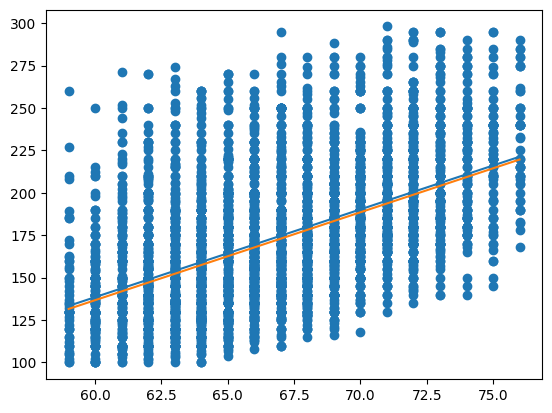

In [17]:
# overlay the scatter + fitted line
fig = plt.figure()
ax = fig.subplots()
ax.scatter(x=X, y=y)

min_height = X.min()
min_weight = reg[0] * min_height + reg[1]
max_height = X.max()
max_weight = reg[0] * max_height + reg[1]
ax.plot([X.min(), X.max()], [min_weight, max_weight])
ax.plot([X.min(), X.max()], [f(X.min()), f(X.max())])
plt.show()

## fittign error, R^2

In [18]:
# predicted weight
df['predicted_weight'] = r[0] * df['height'] + r[1]

In [19]:
# total sum of squares

In [20]:
df['dist_to_mean'] = df['weight'] - df['weight'].mean()

In [21]:
SStotal = (df['dist_to_mean'] ** 2).sum()

In [22]:
df.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight,predicted_weight,dist_to_mean
0,22627,1,2,1,35.30,8,16,76,290,219.594331,115.881352
1,7379,1,1,1,34.71,7,16,76,285,219.594331,110.881352
2,51659,1,1,1,34.71,6,12,76,285,219.594331,110.881352
3,28679,1,2,1,34.10,7,13,76,280,219.594331,105.881352
4,33982,1,1,1,34.10,7,16,76,280,219.594331,105.881352


In [23]:
# residuals
df['residual'] = df['predicted_weight'] - df['weight']

In [24]:
# Total sum of residuals
SSresidual = (df['residual'] ** 2).sum()

### R^2 percentage

In [25]:
# R^2 = 1 - SSresidual / SStotal

In [26]:
R2 = 1 - (SSresidual / SStotal)

In [27]:
R2

0.27046405356005976

# Logistic regression

Let's now consider our output is binary, like over 130lbs, and under 130lbs

In [28]:
df['over_130'] = 1.0 * (df['weight'] > 130)

In [29]:
df.head(10)

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight,predicted_weight,dist_to_mean,residual,over_130
0,22627,1,2,1,35.30,8,16,76,290,219.594331,115.881352,-70.405669,1.0
1,7379,1,1,1,34.71,7,16,76,285,219.594331,110.881352,-65.405669,1.0
2,51659,1,1,1,34.71,6,12,76,285,219.594331,110.881352,-65.405669,1.0
3,28679,1,2,1,34.10,7,13,76,280,219.594331,105.881352,-60.405669,1.0
4,33982,1,1,1,34.10,7,16,76,280,219.594331,105.881352,-60.405669,1.0
5,17425,1,1,1,33.48,7,21,76,275,219.594331,100.881352,-55.405669,1.0
6,42659,1,1,1,33.48,7,16,76,275,219.594331,100.881352,-55.405669,1.0
7,45487,1,1,1,33.48,7,14,76,275,219.594331,100.881352,-55.405669,1.0
8,40270,1,1,1,31.89,6,18,76,262,219.594331,87.881352,-42.405669,1.0
9,4242,1,1,1,31.65,7,13,76,260,219.594331,85.881352,-40.405669,1.0


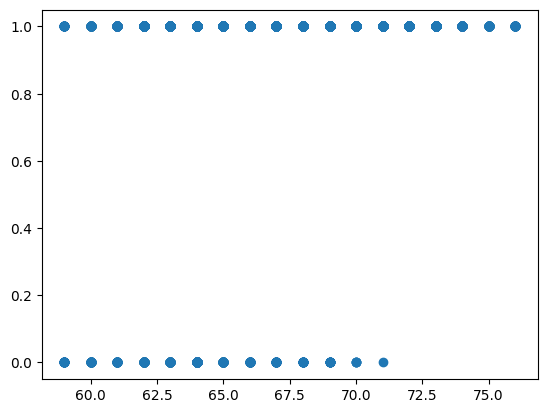

In [30]:
# plot as scatter plot
plt.scatter(x=df['height'], y=df['over_130'])

### Logistic regression attempts to fit the data set X(continuous) to Y (Binary) using a sigmoid function

In [31]:
# helpers to fit the sigmoid
import scipy.optimize


# basic sigmoid is of the form y = 1 / ( 1 + e^-x)
# here we add parameters to adjust offset (x0, y0), slope k, 
def sigmoid(p, x):
    x0, y0, c, k = p
#     y = c / (1.0 + np.exp(-k * (x - x0))) + y0
# we know y0 is 0, and c is 1, so we'll hard code those
    y = 1.0 / (1.0 + np.exp(-k * (x - x0)))
    return y

def residuals(p, x, y):
    return y - sigmoid(p, x)

In [32]:
# initial guess for the sigmoid params p
p_guess = (np.median(df['height']), np.median(df['over_130']), 0.5, 1.0)
p, _, _, _, _ = scipy.optimize.leastsq(residuals, 
                                       p_guess,
                                       args=(df['height'], df['over_130']),
                                       full_output=True)


In [33]:
p

array([59.24643031,  1.        ,  0.5       ,  0.27979972])

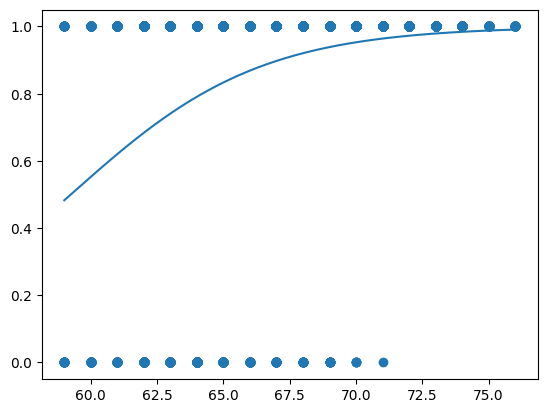

In [34]:
fig = plt.figure()
ax = fig.subplots()
ax.scatter(x=df['height'], y=df['over_130'])

min_height = df['height'].min()
max_height = df['height'].max()
xp = np.linspace(min_height, max_height, 1500)
fit = sigmoid(p, xp)
ax.plot(xp, fit)
plt.show()

## This gives a probability (between 0 and 1) that for a given height, the weight is above 130lbs